In [27]:
import os
import sys

dirname_data = '../../data/Flounder'

filename_rpkmA = os.path.join(dirname_data, 'Kwon201608_KoreanFlounder_Liver.rpkm.txt')

def read_rpkm(filename):
    rv = dict()
    
    f = open(filename,'r')
    
    headers = f.readline().strip().split("\t")
  
    for line in f:
        tokens = line.strip().split()
        gene_id = tokens[0]
        rv[gene_id] = dict()

        sum_rpkm = 0
        for i in range(1,len(tokens)):
            rv[gene_id][headers[i]] = float(tokens[i])
            sum_rpkm += float(tokens[i])
        rv[gene_id]['mean'] = sum_rpkm*1.0/(len(tokens)-1)
    f.close()
    return rv

rpkmA = read_rpkm(filename_rpkmA)

['LiverA', 'LiverB', 'LiverC', 'mean']


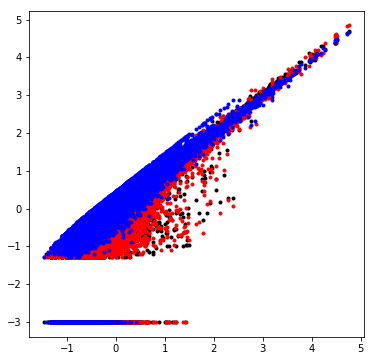

In [29]:
%matplotlib inline

import math
import matplotlib.pyplot as plt

geneListA = sorted(rpkmA.keys())
sampleListA = sorted(rpkmA[ geneListA[0] ].keys())

print(sampleListA)

fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(1,1,1)
ax1.plot([math.log10(rpkmA[x]['mean']+0.001) for x in geneListA], [math.log10(rpkmA[x][sampleListA[0]]+0.001) for x in geneListA], 'k.')
ax1.plot([math.log10(rpkmA[x]['mean']+0.001) for x in geneListA], [math.log10(rpkmA[x][sampleListA[1]]+0.001) for x in geneListA], 'r.')
ax1.plot([math.log10(rpkmA[x]['mean']+0.001) for x in geneListA], [math.log10(rpkmA[x][sampleListA[2]]+0.001) for x in geneListA], 'b.')
plt.show()